# Fundamentals of TensorFlow

In [1]:
import tensorflow as tf

hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


### Tensor
In TensorFlow, data isn't stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of <code>hello_constant = tf.constant('Hello World!')</code>, <code>hello_constant</code> is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

In [2]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234)
# B is a 1-dimensional int32 tensor
B = tf.constant([123, 456, 789])
# C is a 2-dimensional int32 tensor
C = tf.constant([[123, 456, 789], [222, 333, 444]])

The tensor returned by tf.constant() is called a constant tensor, because the value of the tensor never changes.

### Session
TensorFlow's api is built around the idea of a computational graph, a way of visualizing a mathematical process. Let's take the TensorFlow code I run above and turn that into a graph:
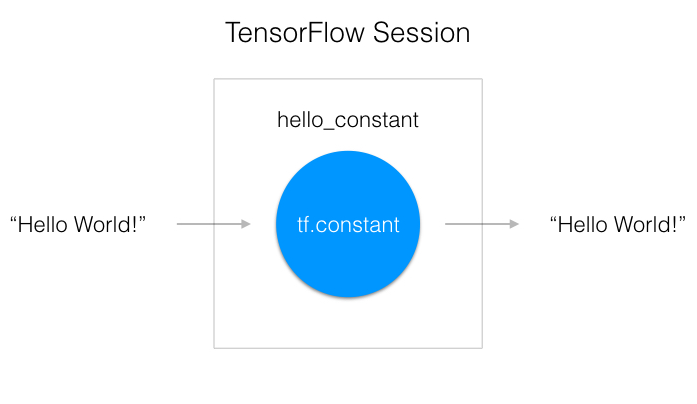
(picture by Udacity content)

A "TensorFlow Session", as shown above, is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. Let's see how I use it.

In [3]:
with tf.Session() as sess:
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


This step is to evaluate the tensor in a session. The code creates a session instance, sess, using <code>tf.Session</code>. The <code>sess.run()</code> function then evaluates the tensor and returns the results.

### Tensorflow Input
I passed a tensor into a session and it returned the result in the above cells. What if I want to use a non-constant? This is where <code>tf.placeholder()</code> and <code>feed_dict</code> come into place.

##### tf.placeholder()
Sadly I can't just set <code>x</code> to my dataset and put it in Tensorflow, because over time I'll want my Tensorflow model to take in different datasets with different parameters. I need <code>tf.placeholder()</code>.
It returns a tensor that gets its value from data passed to the <code>tf.session.run()</code> function, allowing you to set the input right before the session runs.

In [6]:
# tf.placeholder returns a tensor
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    # placeholder is passed to the session.run() function
    # this allows to set the input right before the session runs
    output = sess.run(x, feed_dict={x: 'Hello Tensorflow'})

In [11]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(z, feed_dict={x: 'Test String', y: 123, z: 32.45})
    print(output)

32.45


### TensorFlow Math
Getting the input is great, but now I need to use it. I'm going to use basic math fuctions - add, subtract, multiply, and divide - with tehsors.]

They takes in two numbers, two tensors, or one of each, and returns their sum as a tensor.

In [12]:
x = tf.add(5,2) # 7
y = tf.subtract(10, 4) # 6
z = tf.multiply(2, 5) # 10

#### Converting types
It may be necessary to convert between types to make certain operations work together.

<code>tf.subtract(tf.constant(2.0), tf.constant(1))</code>

If I run this code, it will lead to ValueError.

In [14]:
tf.subtract(tf.cast(tf.constant(2.0), tf.int32), tf.constant(1)) # 1

<tf.Tensor 'Sub_2:0' shape=() dtype=int32>

### TensorFlow Linear Function
Let's dive the function <code>y = Wx + b</code>. I want to translate our input x to labels y.

For example, imagine we want to classify images as digits(binary). x would be our list of pixel values, and y would be the logits, one for each digit. Let's take a look at <code>y = Wx</code>, where the weights, W, determine the influence of x at predicting each y.

<code>y = Wx</code> allows us to segment the data into their respective labels using a line. However, this line has to pass through the origin, because whenever x equals 0, then y is also going to equal 0. We want the ability to shift the line away from the origin to fit more complex data. The simplest solution is to add a number to the function, which we call "bias". 

Our new function becomes <code>Wx + b</code>, allowing us to create predictions on linearly separable data.

#### Transposition
I've been using the <code>y = Wx + b</code> function for my linear function. But there is another function that does the same thing, <code>y = xW + b</code>. These functions do the same thing and are interchangeable, except for the dimensions of the matrices involved.

TensorFlow actually uses this.

### Weights and Bias in TensorFlow
The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use wights and bias, you'll need a Tnesor that can be modified. This leaves out <code>tf.placeholder()</code> and <code>tf.constant()</code>, since those Tensors can't be modified. This is where <code>tf.Variable</code> class comes in.

##### tf.Variable()

In [23]:
x = tf.Variable(5)

The <code>tf.Variable</code> class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session (I understand the meaning of this line as holding a context in Java), so you must initialize the state of the tensor manually. I'll use the <code>tf.global_variables_initializer()</code> function to initialize the state of all the Variable tensors.

##### tf.grobal_variables_initializer()

In [24]:
# Initialization
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

The <code>tf.global_variables_initializer()</code> call returns an operation that will initialize all TensorFlow variables from the graph. I call the opration using a session to initialize all the variables as shown above. Using the <code>tf.Variable</code> class allows us to change the weights and bias, but an initial value needs to be chosen.

**Initializing the weights with random numbers from a normal distribution** is good practice. Randomizing the weights helps the model from becoming stuck in the same place every time you train it.

Similarly, choosing weights from a normal distribution **prevents any one weight from overwhelming other weights**. I'll use the <code>tf.truncated_normal()</code> function to generate random numbers from a normal distribution.

##### tf.truncated_normal()

In [25]:
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

The <code>tf.truncated_normal()</code> function returns a tensor with random values from a normal distribution whose magnitude is no mre than 2 standard deviations from the mean.

Since the weights are already helping prevent the model from getting stuck, I don't need to randomize the bias. Let's use the simplest solution, setting the bias to 0.

##### tf.zeros()
The <code>tf.zeros()</code> function returns a tensor with all zeros.

In [27]:
n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

### Softmax
The next step is to **assign a probability to each label**, which you can then use to classify the data. Use the softmax function to turn your logits into probabilities.
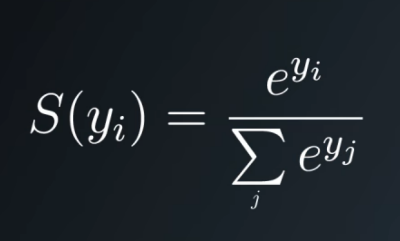
(image by Udacity content)

We can do this by using the formula above, which uses the input of y values and the matematical constant "e" which is approximately equal to 2.718. By taking "e" to the power of any real value we always get back a positive value, this the helps us scale when having negative y values. The summation symbol on the bottom of the divisor indicates that we add togethre all the e^(input y value) elements in order to get our calculated probability outputs.

In [29]:
import numpy as np 

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

logits = [3.0, 1.0, 0.2]
print(softmax(logits))

[0.8360188  0.11314284 0.05083836]


### TensorFlow Softmax


In [3]:
logit_data = [2.0, 1.0, 0.1]
logits = tf.placeholder(tf.float32)
softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    output = sess.run(softmax, feed_dict={logits: logit_data})
    print(output)

[0.6590012  0.24243298 0.09856589]


### One-Hot Encoding
We need a way to represent our labels mathematically. Let's have the probabilities for the correct class be close to one and the probability for all the others be close to zero. Each label will be represented by a vector, that is as long as there are classes and it has the value 1.0 for the correct class and 0.0 for every other classes. This is often called one-hot encoding.

### Cross Entropy
One-hot encoding works very well from most problems until I get into situations where I have tens of thousands, or even millions classes. In that case, my vector becomes really really large and has mostly zeros everywhere and that becomes very inefficient. (To deal with this problem I can use embeddings.) 

What's nice about this approach is that we can now measure how well we're doing by simply comparing two vectors. One that comes out of my classifiers and contains the probabilities of my classes(S) and the one-hot encoded vector that corresponds to my labels(L).

The natural way to measure the distance between those two probability vector is called the **Cross Entropy**. 

    D(S,L) = -ΣLi*log(Si)
I'll denote it by D here for distance. My labels, because they're one-hot encoded, will have a lot of zeros in them and I don't want to take the log of zeros. For my distribution, the softmax will always guarantee that I have a little bit of probability going everywhere, so I never really take a log of zero.

### Multinomial Logistic Classification
Linear Model -> Sigmoid Activation -> Cross Entropy

    D(S(Wx + b), L)

### Minimizing Cross Entropy
How we're goint to find those weights w and biases b that will get our classifier to do what we want it to do. That is, have a low distance for the correct class but have a high distance for the incorrect class. One thing I can do is measure that distance averaged over the entire training sets for all the inputs and all the labels that I have available. That's called the **training loss**. This loss which is the **average cross-entropy** over my entire training set is one humongous function. 
    
    Loss = 1/N Σ D(S(Wx + b), L)
    
The loss is a function of the weights and the biases. So we are simply going to try and minimize that function. There is lots of ways to solve a **numerical optimization problem**. The simplest way is **gradient descent**. Take the derivertive of my loss with respect to my parameters and follow that derivative by taking a step backwards and repeat until I get to the bottom.

There are two practical things.
 - First is how do I fill image pixels to this classifier
 - Where do I initialize the optimization

#### Numerical Stability
This is where we have to talk a bit about numerical stability. When I do numerical computations, I always have to worry about a bit about calculating values that are too large or too small. In particular, adding very small values to a very large value can introduce a lot of errors. 

Try it in python:

In [6]:
a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print(a - 1000000000)

# result should be 1.0

0.95367431640625


We're going to want the values involved in the calculation of this big lost function that we care about to never get too big or too small.

##### Normalized training data (to have zero mean and unit variance)
One good guiding principle is that we **always want our variables to have 0 mean** and **equal variance whenever possible**. On top of the numerical issures there are also a really good mathematical reasons to keep values I compute roughly around a mean of zero. Well conditioned problem makes searching to find an optim a lot easier for the optimizer to do its job.

For example:
 - Image => I can take the pixel values of my image, they are usually between 0 and 255. And simply subtract 128 and divide by 128. It doesn't change the content of my image, but it makes it much easier for the optimization proceed numerically.
 
##### Weight Initialization
I want to take a good enough starting point of weights and bias for the gradient descent to proceed. Draw the weights randomly from a Gaussian Distribution would mean zero and standard deviation sigma. The sigma value determines the order of magnitude of my outputs at the initial point of my optimization. Because of the softmax on top of it, the order of magnitue also determines the peakiness of your initial probability distribution. A large sigma will mean that my distribution will have large peaks, it's going to be very opinionated. A small sigma means that my distribution is very uncertain about things. It's usually better to begin with an uncertain distribution and let the optimization become more confident as the training progress. So use a small sigma to begin with.